In [ ]:
# Fraud Analysis in ML with credit card dataset
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")


In [ ]:
# Grab a peek at the data
data.head(6)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0


In [ ]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(279191, 31)
                Time             V1             V2             V3  \
count  279191.000000  279191.000000  279191.000000  279191.000000   
mean    93288.909044      -0.001272      -0.006659       0.015942   
std     46717.517069       1.956449       1.650325       1.513140   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     53586.000000      -0.920245      -0.603004      -0.867944   
50%     83243.000000       0.019639       0.062200       0.198216   
75%    137540.000000       1.308995       0.796786       1.039497   
max    168698.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  279191.000000  279191.000000  279190.000000  279190.000000   
mean        0.002664      -0.006015       0.002661      -0.002442   
std         1.415707       1.379304       1.330464       1.235443   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.848314

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0017473798272713247
Fraud Cases: 487
Valid Transactions: 278703


In [ ]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     487.000000
mean      121.913326
std       257.561705
min         0.000000
25%         1.000000
50%         9.130000
75%       105.350000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print('details of valid transaction')
valid.Amount.describe()


details of valid transaction


count    278703.000000
mean         88.676558
std         250.460854
min           0.000000
25%           5.760000
50%          22.190000
75%          77.850000
max       25691.160000
Name: Amount, dtype: float64

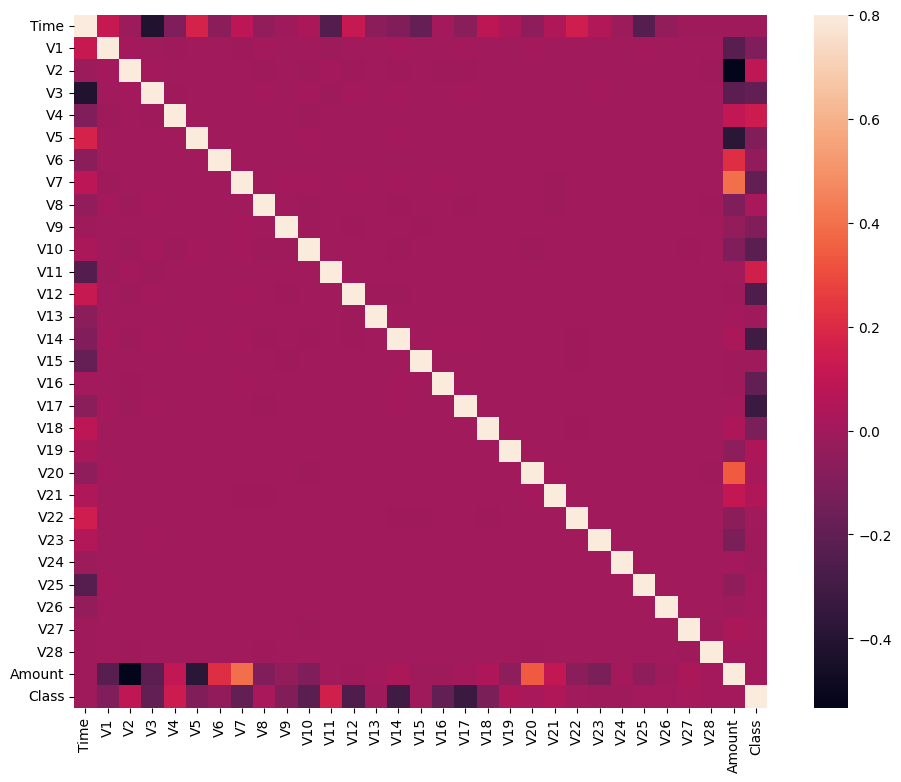

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()
